# Data Scence and Analytics Internship -LGMVIP

## Name- Neha Kule

### Intermediate Level 

### Task1 - Exploratory Data Analysis on Global Terrorism

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing Data

In [2]:
data=pd.read_csv("Global Terrorism-EDA.csv",encoding="latin1")
df=pd.DataFrame(data)
df.head

C:\Users\my pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method NDFrame.head of              eventid   iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11  1970.0     7.0   2.0        NaN       0.0        NaN   
1       1.970000e+11  1970.0     0.0   0.0        NaN       0.0        NaN   
2       1.970010e+11  1970.0     1.0   0.0        NaN       0.0        NaN   
3       1.970010e+11  1970.0     1.0   0.0        NaN       0.0        NaN   
4       1.970010e+11  1970.0     1.0   0.0        NaN       0.0        NaN   
...              ...     ...     ...   ...        ...       ...        ...   
181684           NaN     NaN     NaN   NaN        NaN       NaN        NaN   
181685           NaN     NaN     NaN   NaN        NaN       NaN        NaN   
181686           NaN     NaN     NaN   NaN        NaN       NaN        NaN   
181687           NaN     NaN     NaN   NaN        NaN       NaN        NaN   
181688           NaN     NaN     NaN   NaN        NaN       NaN        NaN   

        country         country_t

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181689 entries, 0 to 181688
Columns: 135 entries, eventid to related
dtypes: float64(77), object(58)
memory usage: 146.9+ MB


In [4]:
df.shape

(181689, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
for i in df.columns:
    print(i,end=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

#### Cleaning the Data 

In [7]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt",
       "targtype1_txt","gname","weaptype1_txt","motive","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,motive,nkill,nwound,addnotes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,Unknown,NaN,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN,NaN


In [8]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province","city":"City","latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"AttackType","targtype1_txt":"TargetType","gname":"GroupName","weaptype1_txt":"WeaponType","motive":"Motive","nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

C:\Users\my pc\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
df.head()

,Year,Month,Day,Country,Region,Province,City,Latitude,Longitude,Location,Summary,AttackType,TargetType,GroupName,WeaponType,Motive,Killed,Wounded,Add Notes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,Unknown,NaN,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN,NaN


In [10]:
df.shape

(181689, 19)

In [11]:
df.isnull().sum()

Year             500
Month            500
Day              500
Country          500
Region           500
Province         921
City             934
Latitude        5053
Longitude       5054
Location      126490
Summary        66629
AttackType       500
TargetType       500
GroupName        500
WeaponType       500
Motive        131201
Killed         10787
Wounded        16758
Add Notes     153528
dtype: int64

In [12]:
df['Killed']=df['Killed'].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

<ipython-input-12-a6a46df0ca15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Killed']=df['Killed'].fillna(0)
<ipython-input-12-a6a46df0ca15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wounded"]=df["Wounded"].fillna(0)
<ipython-input-12-a6a46df0ca15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [13]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181189.000000,181189.000000,181189.000000,176636.000000,1.766350e+05,181689.000000,181689.000000,181689.000000
mean,2002.599209,6.451948,15.492088,23.496512,-4.601463e+02,2.261122,2.878094,5.139216
std,13.256192,3.380438,8.815506,18.579878,2.050680e+05,11.224390,34.308733,40.553115
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.512149,4.367415e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.470202,4.323489e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.686110,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


##### Observations

#The data shows the terrorists attack from 1970 to 2017.
#The maximum killed in an attack  were 1570 people.
#The maximum  number of people wounded in an attack was ; 8191 

## Data Visualization

##### 1)Year wise Attacks 

In [14]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970.0,651
1971.0,471
1972.0,568
1973.0,473
1974.0,581


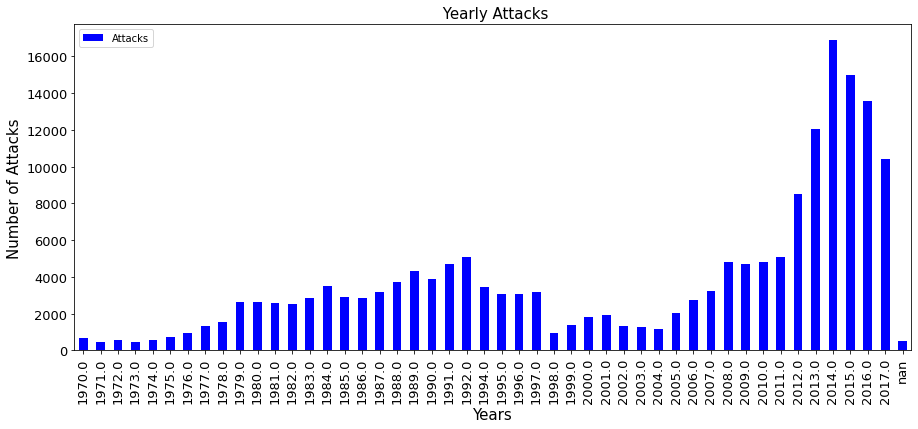

In [15]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title(" Yearly Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

       Most number of attacks in 2014
       Least number of attacks from 1971 to 1976

2.Total Casualties i.e (Killed+ Wounded)

In [16]:
cas=df[["Year","Casualty"]].groupby("Year").sum()
cas.head()

,Casualty
Year,
1970.0,386.0
1971.0,255.0
1972.0,975.0
1973.0,865.0
1974.0,1404.0


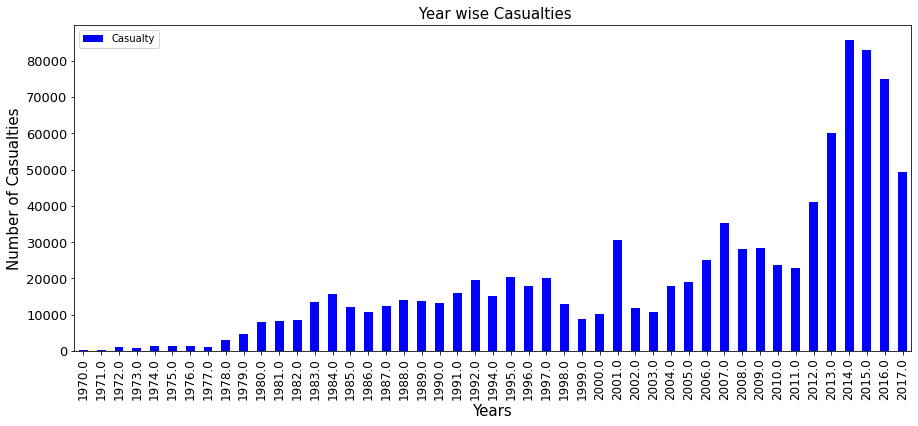

In [17]:
cas.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title(" Year wise Casualties",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

     Most number of casualties were in 2014
     Least number of casualties on and before 1971

 3.Killed in each Year

In [18]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970.0,174.0
1971.0,173.0
1972.0,566.0
1973.0,370.0
1974.0,539.0


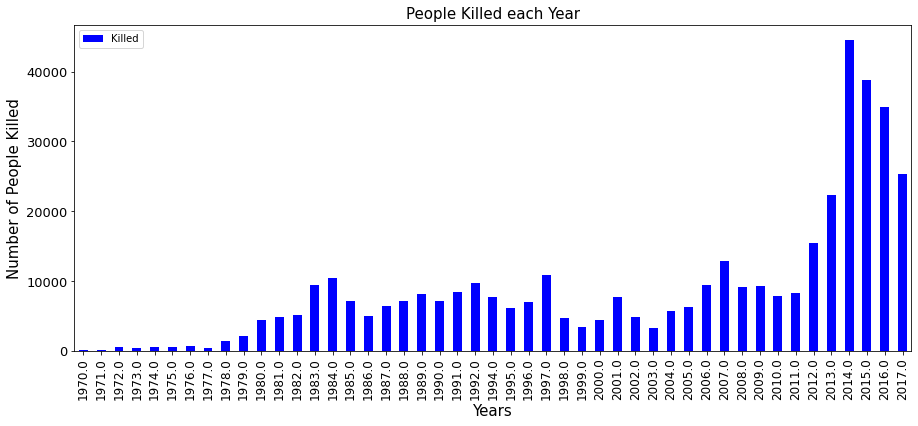

In [19]:
yk.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("People Killed each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killed",fontsize=15)
plt.show()

4.Wounded in each Region

In [20]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970.0,212.0
1971.0,82.0
1972.0,409.0
1973.0,495.0
1974.0,865.0


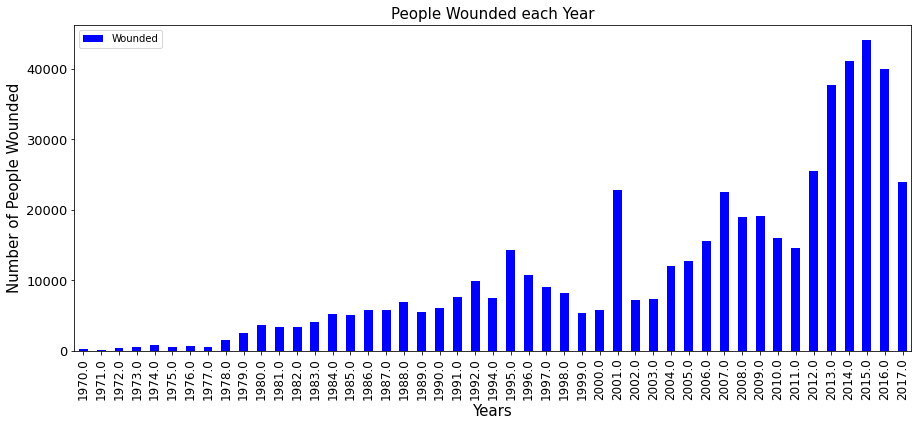

In [21]:
yw.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("People Wounded each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Wounded",fontsize=15)
plt.show()

    Number of People wounded were maximum in 2015

##### 2)Region wise attacks

In [22]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970.0,1,7,0,2,12,28,472,65,1,10,3,50
1971.0,1,5,0,1,5,55,247,24,0,6,2,125
1972.0,8,3,0,0,1,53,73,33,1,16,4,376
1973.0,1,6,0,2,1,19,64,83,1,2,4,290
1974.0,1,11,0,4,2,42,111,81,2,3,7,317


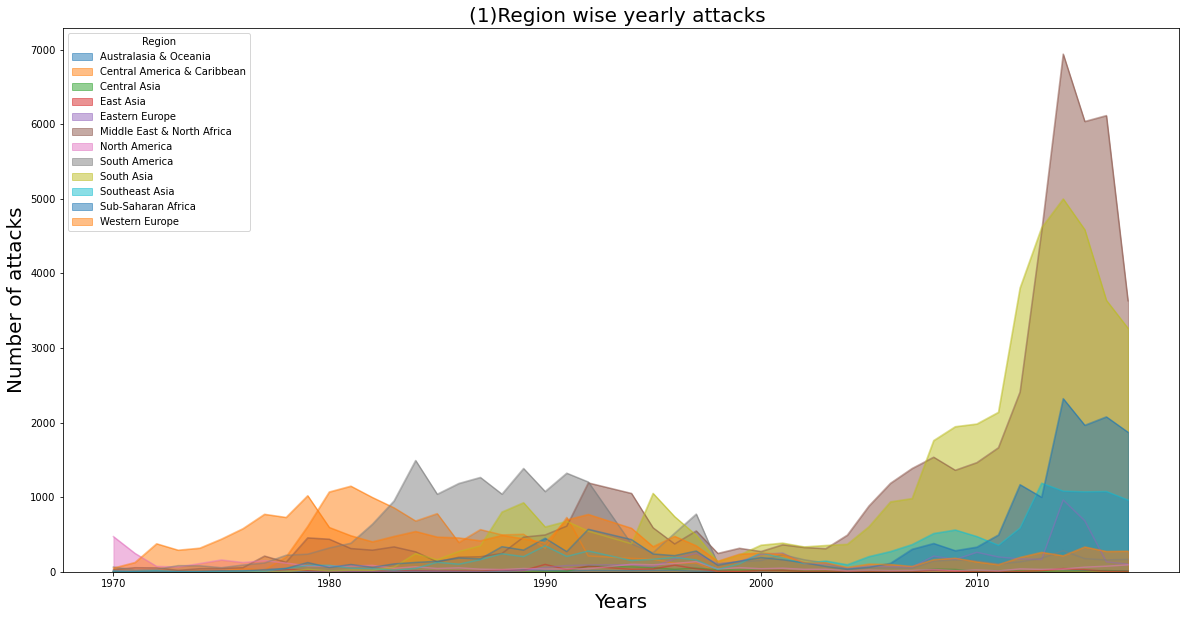

In [23]:
reg.plot(kind="area",stacked=False, alpha=0.5,figsize=(20,10))
plt.title("(1)Region wise yearly attacks ",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

2.Total Terrorist Attacks in each Region from1970-2017

In [24]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50327
South Asia                     44809
South America                  18973
Sub-Saharan Africa             17451
Western Europe                 16624
Southeast Asia                 12427
Central America & Caribbean    10344
Eastern Europe                  5136
North America                   3452
East Asia                        802
Central Asia                     563
Australasia & Oceania            281
Name: Total, dtype: int64

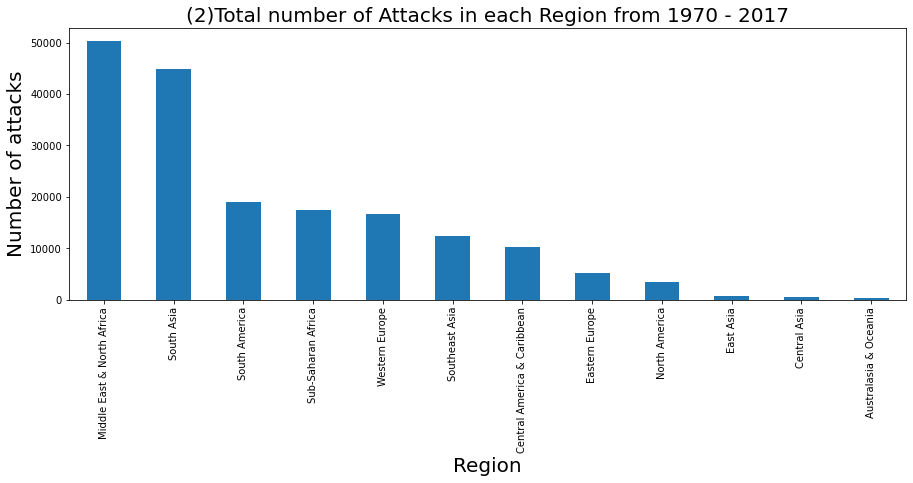

In [25]:
ra.plot(kind="bar",figsize=(15,5))
plt.title("(2)Total number of Attacks in each Region from 1970 - 2017",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

Casualties in each region

In [26]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351492.0
South Asia,241752.0
Sub-Saharan Africa,130766.0
South America,45548.0
Southeast Asia,41818.0
Central America & Caribbean,37699.0
North America,26440.0
Western Europe,25020.0
Eastern Europe,19439.0


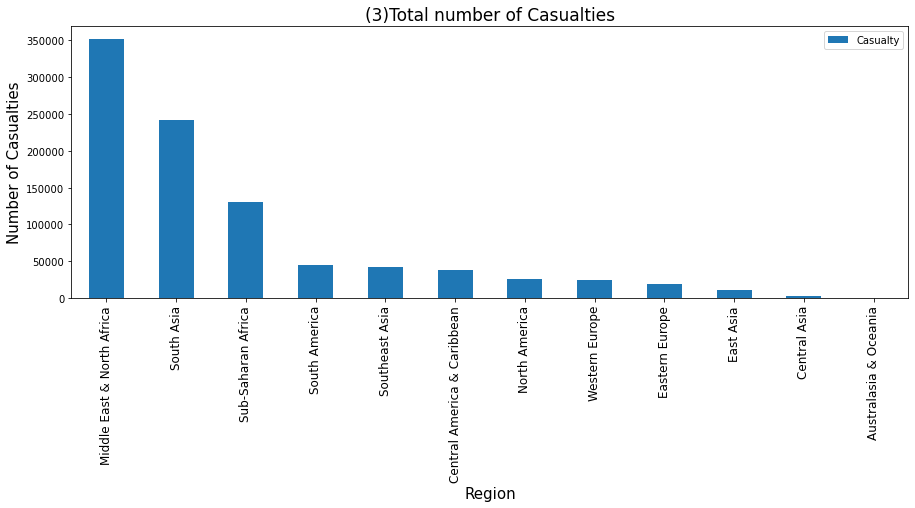

In [27]:
rc.plot(kind="bar",figsize=(15,5))
plt.title("(3)Total number of Casualties",fontsize=17)
plt.xlabel("Region",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

Wounded in each Region

In [28]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137375.0
South Asia,100884.0
Sub-Saharan Africa,78075.0
South America,28846.0
Central America & Caribbean,28708.0
Southeast Asia,15609.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4914.0


In [29]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214117.0
South Asia,140868.0
Sub-Saharan Africa,52691.0
Southeast Asia,26209.0
North America,21526.0
Western Europe,18326.0
South America,16702.0
Eastern Europe,12024.0
East Asia,9213.0


<function matplotlib.pyplot.show(close=None, block=None)>

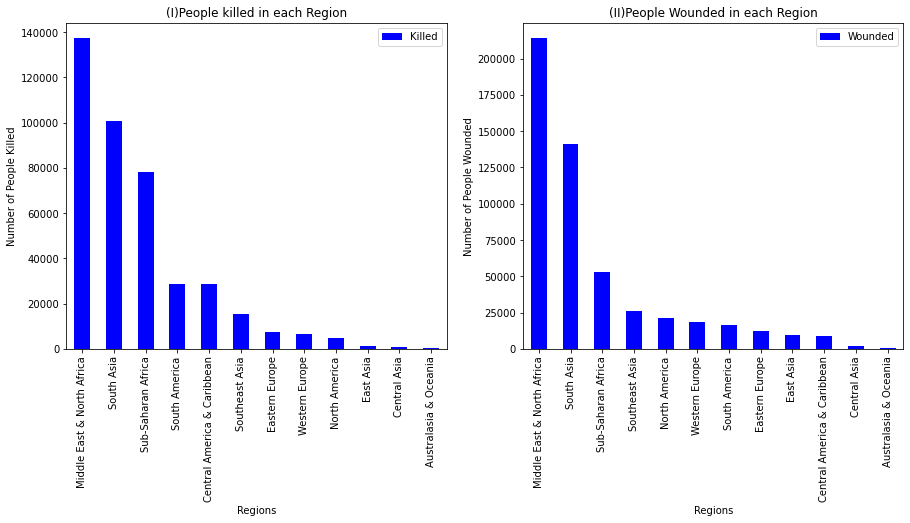

In [30]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

rk.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("(I)People killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

rw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("(II)People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show



### 3.Country wise attacks - Top 10 

1.Number of Attacks in each Country

In [31]:
ct=df['Country'].value_counts().head(10)
ct

Iraq              24548
Pakistan          14331
Afghanistan       12647
India             11920
Colombia           8303
Philippines        6865
Peru               6096
El Salvador        5320
United Kingdom     5231
Turkey             4284
Name: Country, dtype: int64

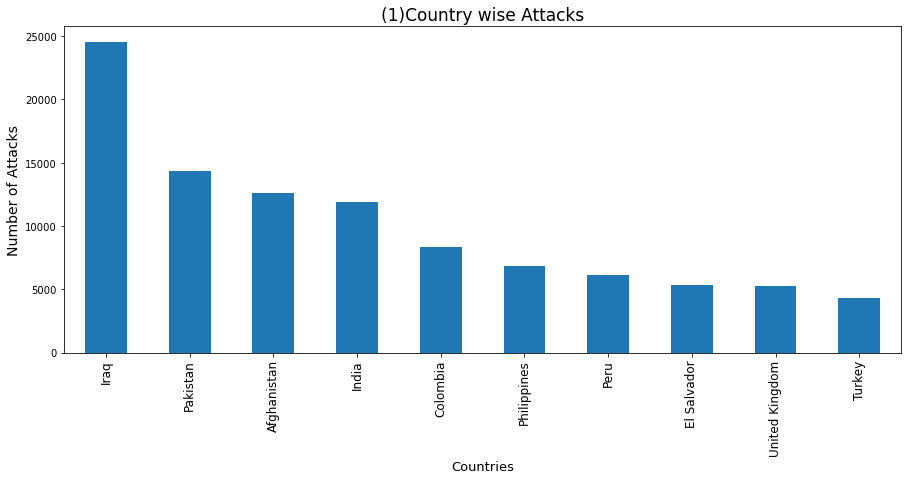

In [32]:
ct.plot(kind="bar",figsize=(15,6))
plt.title("(1)Country wise Attacks",fontsize=17)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

2.Total Casualties in each Country

In [33]:
cac=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cac.head(10)

,Casualty
Country,
Iraq,212958.0
Afghanistan,82904.0
Pakistan,65726.0
India,48291.0
Nigeria,32713.0
Sri Lanka,31091.0
Syria,29309.0
Colombia,25021.0
United States,24467.0


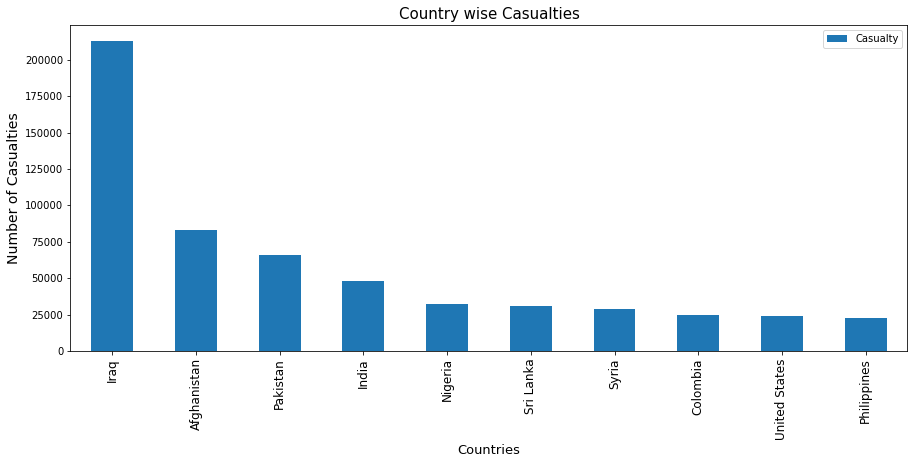

In [34]:
cac[:10].plot(kind="bar",figsize=(15,6))
plt.title("Country wise Casualties",fontsize=15)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

3.Killed in each Country

In [35]:
kic=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
kic.head(10)

,Killed
Country,
Iraq,78404.0
Afghanistan,39014.0
Pakistan,23780.0
Nigeria,22530.0
India,19318.0
Sri Lanka,15530.0
Syria,15212.0
Colombia,14695.0
Peru,12771.0


4.Wounded in each Country

In [36]:
woc=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
woc.head(10)

,Wounded
Country,
Iraq,134554.0
Afghanistan,43890.0
Pakistan,41946.0
India,28973.0
United States,20697.0
Sri Lanka,15561.0
Syria,14097.0
Philippines,13329.0
Lebanon,10904.0


<function matplotlib.pyplot.show(close=None, block=None)>

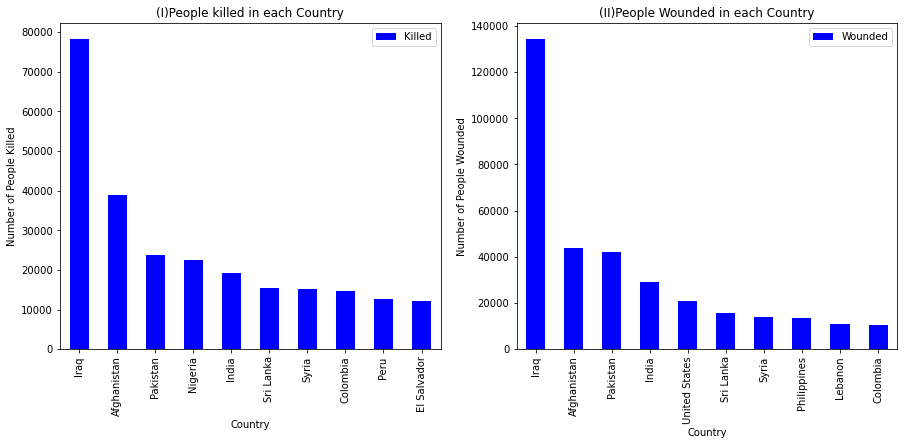

In [37]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

kic[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("(I)People killed in each Country")
ax0.set_xlabel("Country")
ax0.set_ylabel("Number of People Killed")

woc[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("(II)People Wounded in each Country")
ax1.set_xlabel("Country")
ax1.set_ylabel("Number of People Wounded")

plt.show

### 4.Terrorist Group wise Attacks

1.Number of Attacks by each Group

In [38]:
grp=df["GroupName"].value_counts()[1:10]
grp

Taliban                                             7423
Islamic State of Iraq and the Levant (ISIL)         5582
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3248
New People's Army (NPA)                             2752
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2396
Name: GroupName, dtype: int64

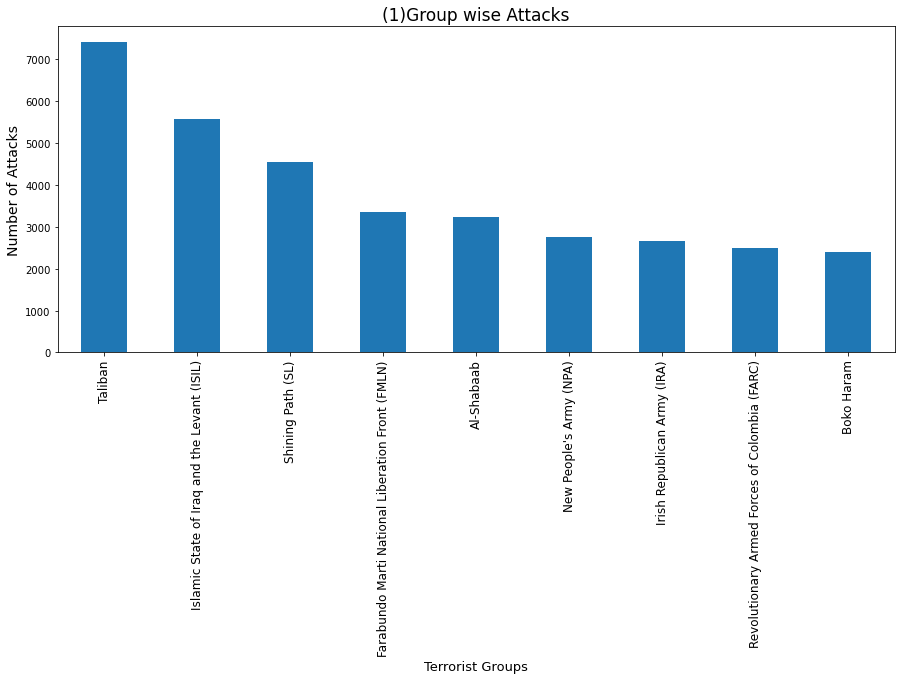

In [39]:
grp.plot(kind="bar",figsize=(15,6))
plt.title("(1)Group wise Attacks",fontsize=17)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

2.Total Casualties by each Group

In [40]:
gc=df[["GroupName","Casualty"]].groupby("GroupName").sum().sort_values(by="Casualty",ascending=False)
gc.head(10)

,Casualty
GroupName,
Unknown,322359.0
Islamic State of Iraq and the Levant (ISIL),69391.0
Taliban,56846.0
Boko Haram,29590.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16878.0
Tehrik-i-Taliban Pakistan (TTP),15569.0
Al-Qaida in Iraq,14724.0


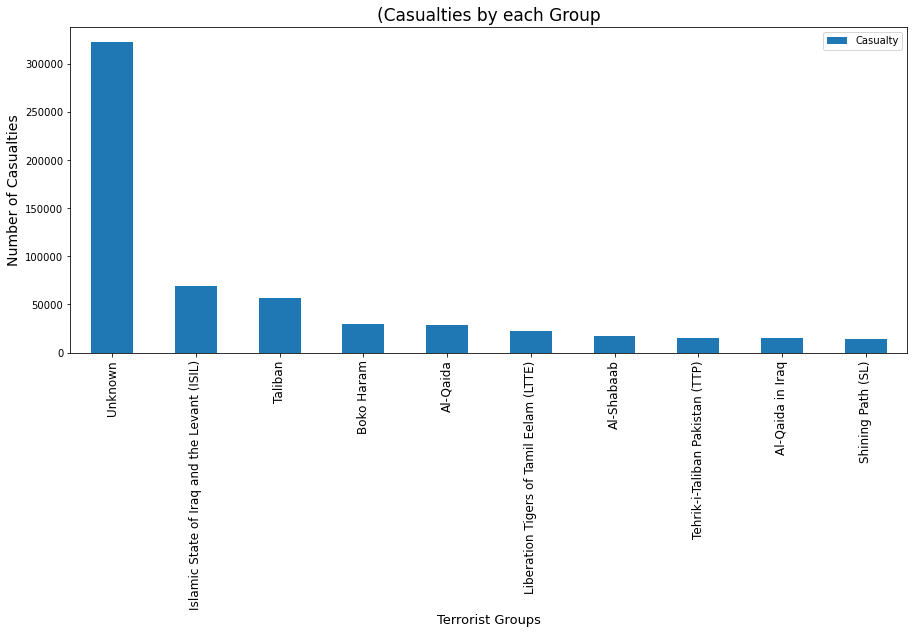

In [41]:
gc.head(10).plot(kind="bar",figsize=(15,6))
plt.title("(Casualties by each Group",fontsize=17)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

3.Killed by each Group

In [42]:
gk=df[["GroupName","Casualty"]].groupby("GroupName").sum().sort_values(by="Casualty",ascending=False)
gk.head(10)

,Casualty
GroupName,
Unknown,322359.0
Islamic State of Iraq and the Levant (ISIL),69391.0
Taliban,56846.0
Boko Haram,29590.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16878.0
Tehrik-i-Taliban Pakistan (TTP),15569.0
Al-Qaida in Iraq,14724.0


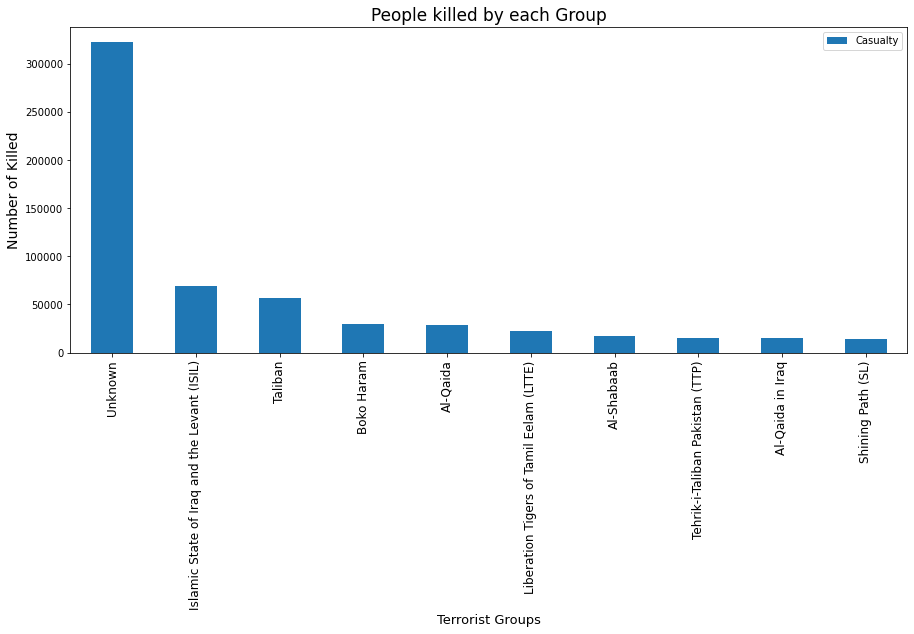

In [43]:
gk.head(10).plot(kind="bar",figsize=(15,6))
plt.title("People killed by each Group",fontsize=17)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Killed",fontsize=14)
plt.show()

### 5.Attack Type wise Attacks

1.Number of Attacks by each Attack Type

In [44]:
at=df["AttackType"].value_counts()
at

Bombing/Explosion                      88036
Armed Assault                          42547
Assassination                          19277
Hostage Taking (Kidnapping)            11121
Facility/Infrastructure Attack         10327
Unknown                                 7224
Unarmed Assault                         1011
Hostage Taking (Barricade Incident)      987
Hijacking                                659
Name: AttackType, dtype: int64

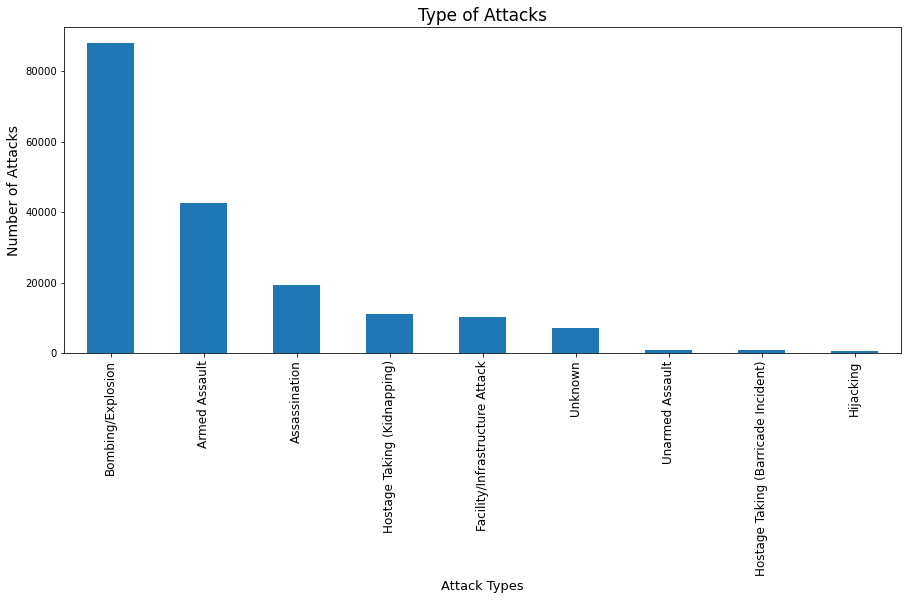

In [45]:
at.plot(kind="bar",figsize=(15,6))
plt.title("Type of Attacks",fontsize=17)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

2.Total Casualties[Killed + Wounded] by each Attack Type

In [46]:
ac=df[["AttackType","Casualty"]].groupby("AttackType").sum().sort_values(by="Casualty",ascending=False)
ac.head(10)

,Casualty
AttackType,
Bombing/Explosion,529079.0
Armed Assault,237251.0
Unknown,46619.0
Assassination,38733.0
Hostage Taking (Kidnapping),30603.0
Hijacking,20719.0
Unarmed Assault,14886.0
Hostage Taking (Barricade Incident),8443.0
Facility/Infrastructure Attack,7406.0


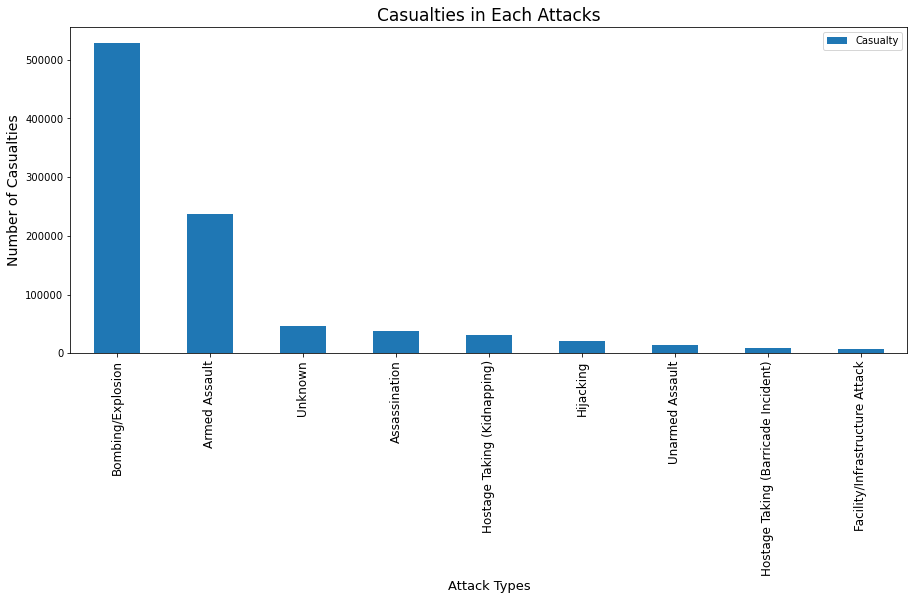

In [47]:
ac.plot(kind="bar",figsize=(15,6))
plt.title("Casualties in Each Attacks",fontsize=17)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [48]:
ak=df[["AttackType","Killed"]].groupby("AttackType").sum().sort_values(by="Killed",ascending=False)
ak.head(10)

,Killed
AttackType,
Armed Assault,160016.0
Bombing/Explosion,156999.0
Unknown,32034.0
Assassination,24886.0
Hostage Taking (Kidnapping),24170.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3641.0
Unarmed Assault,879.0


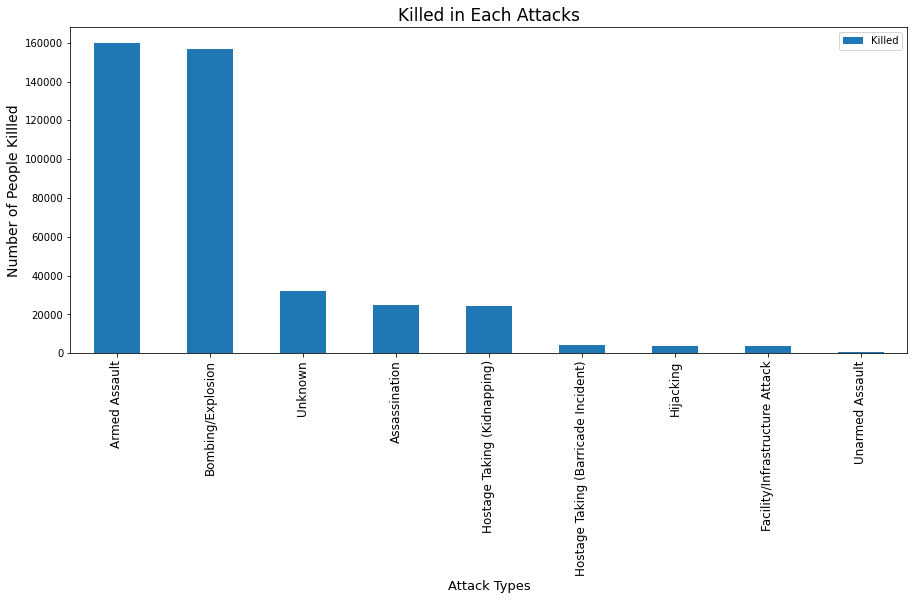

In [49]:
ak.plot(kind="bar",figsize=(15,6))
plt.title("Killed in Each Attacks",fontsize=17)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killled",fontsize=14)
plt.show()

### 6.Target Type wise Attacks

1.Number of Attacks over Target Type

In [50]:
tat=df["TargetType"].value_counts()
tat

Private Citizens & Property       43378
Military                          27870
Police                            24444
Government (General)              21244
Business                          20628
Transportation                     6794
Utilities                          6010
Unknown                            5859
Religious Figures/Institutions     4426
Educational Institution            4317
Government (Diplomatic)            3567
Terrorists/Non-State Militia       3030
Journalists & Media                2938
Violent Political Party            1862
Airports & Aircraft                1343
Telecommunication                  1006
NGO                                 968
Tourists                            438
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               136
Name: TargetType, dtype: int64

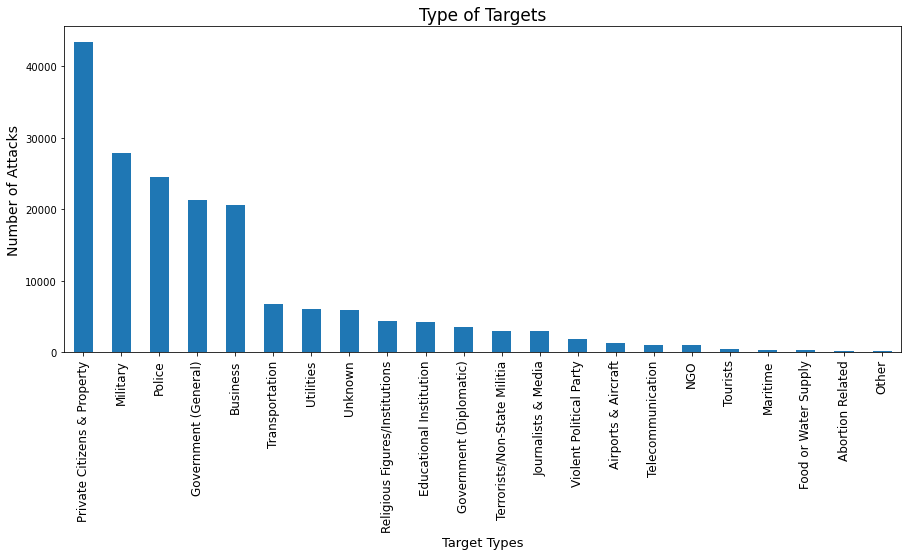

In [51]:
tat.plot(kind="bar",figsize=(15,6))
plt.title("Type of Targets",fontsize=17)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

2.Total Casualties[Killed + Wounded] in each Target

In [52]:
tac=df[["TargetType","Casualty"]].groupby("TargetType").sum().sort_values(by="Casualty",ascending=False)
tac

,Casualty
TargetType,
Private Citizens & Property,318518.0
Military,176625.0
Police,118085.0
Business,77889.0
Government (General),67193.0
Transportation,54578.0
Religious Figures/Institutions,37668.0
Terrorists/Non-State Militia,17273.0
Educational Institution,13962.0


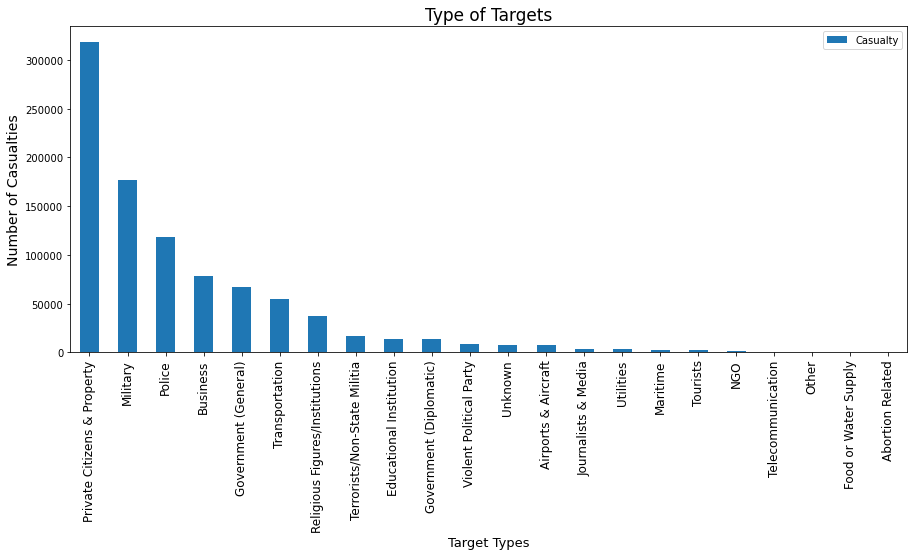

In [53]:
tac.plot(kind="bar",figsize=(15,6))
plt.title("Type of Targets",fontsize=17)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=14)
plt.show()

In [54]:
tak=df[["TargetType","Killed"]].groupby("TargetType").sum().sort_values(by="Killed",ascending=False)
tak

,Killed
TargetType,
Private Citizens & Property,140151.0
Military,105777.0
Police,53517.0
Government (General),26038.0
Business,23448.0
Transportation,13911.0
Religious Figures/Institutions,13334.0
Terrorists/Non-State Militia,9066.0
Unknown,4312.0


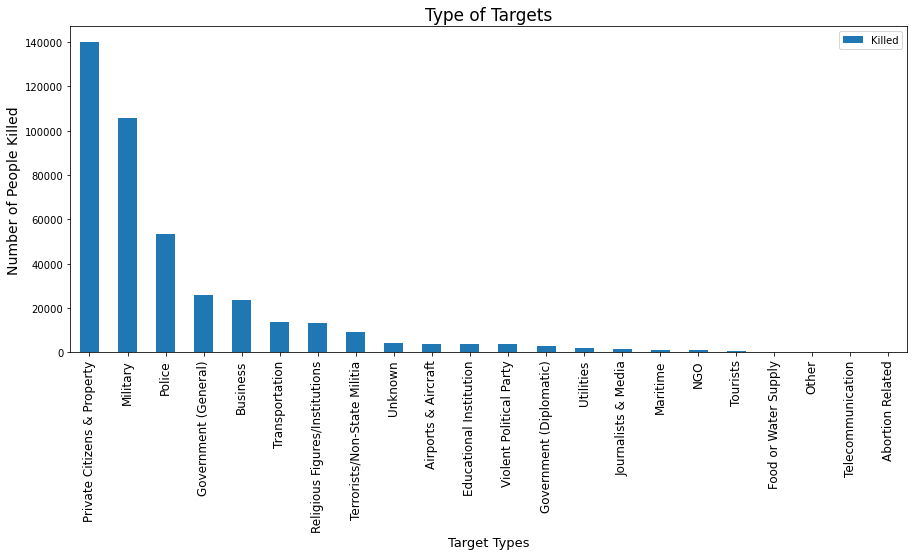

In [55]:
tak.plot(kind="bar",figsize=(15,6))
plt.title("Type of Targets",fontsize=17)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killed",fontsize=14)
plt.show()

### 7.Group and Country Wise - Top 10

1.Sorting number of Attacks

In [56]:
gca=df[["GroupName","Country"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\my pc\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


GroupName                                         Country       
Taliban                                           Afghanistan       7368
Islamic State of Iraq and the Levant (ISIL)       Iraq              4768
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2833
New People's Army (NPA)                           Philippines       2750
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2102
Boko Haram                                        Nigeria           2073
dtype: int64

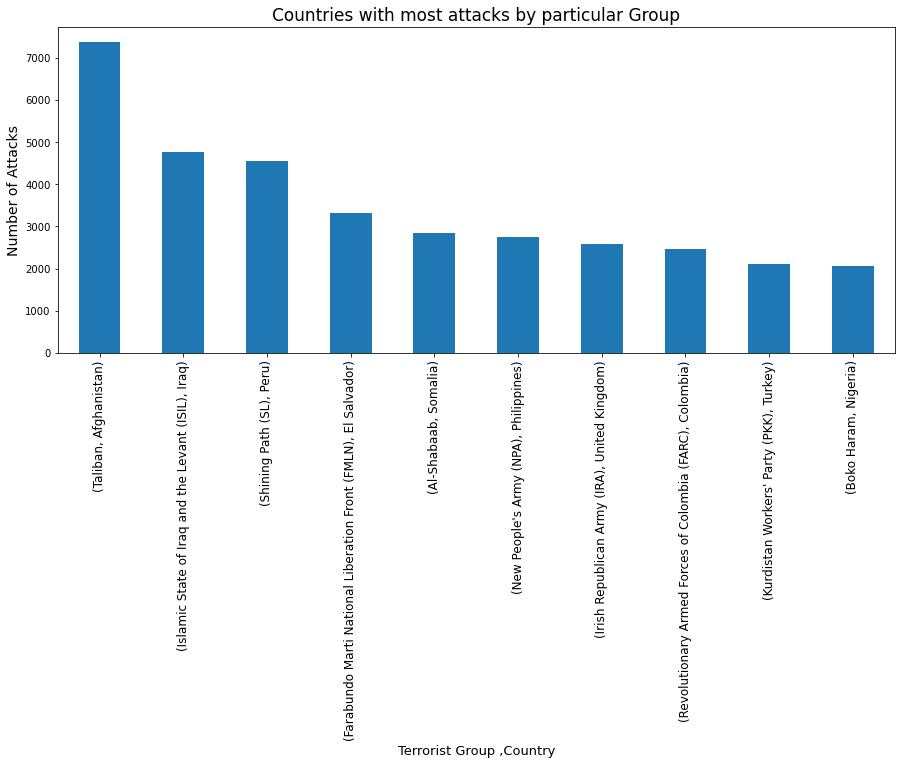

In [57]:
gca.head(10).plot(kind="bar",figsize=(15,6))
plt.title("Countries with most attacks by particular Group",fontsize=17)
plt.xlabel("Terrorist Group ,Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

2.Sorting by Number of People Killed

In [58]:
gck=df[["GroupName","Country","Killed"]].groupby(["GroupName","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gck

,,Killed
GroupName,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,30899.0
Taliban,Afghanistan,28996.0
Boko Haram,Nigeria,16785.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
...,...,...
Civil Servants and Unionists,Brazil,0.0
Civil Cooperation Bureau,South Africa,0.0
Mustafa Aktas Fighting Unit,West Germany (FRG),0.0


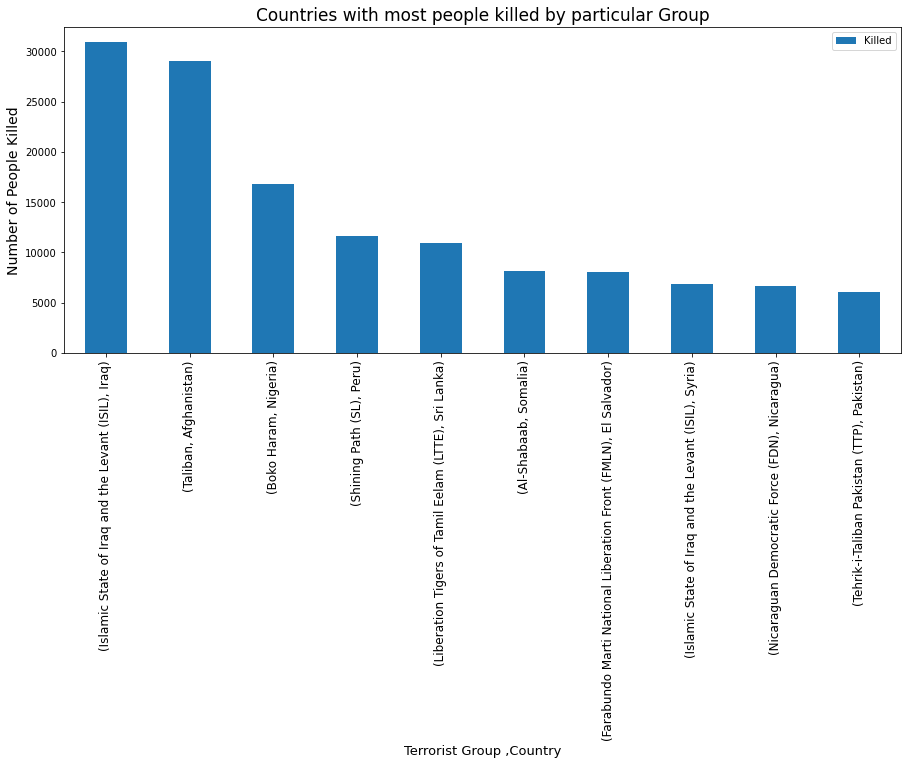

In [59]:
gck.head(10).plot(kind="bar",figsize=(15,6))
plt.title("Countries with most people killed by particular Group",fontsize=17)
plt.xlabel("Terrorist Group ,Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killed",fontsize=14)
plt.show()


### //Humanity Affected World-wide by Terrorist Attacks from 1970 to 2017//

In [60]:
#Total Casualties 
casualty=df.loc[:,"Casualty"].sum()
print("Total Number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world:\n",casualty)

Total Number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world:
 933739.0


In [61]:
#Total  Number of people Killed
killed=df.loc[:,'Killed'].sum()
print("Total number of People Killed were\n",killed)

#Total wounded people
wound=df.loc[:,"Wounded"].sum()
print("Total number of people wounded were\n",wound)

Total number of People Killed were
 410821.0
Total number of people wounded were
 522918.0


## Observations